In [0]:
import nltk
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import tweepy
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Blobber
tb = Blobber(analyzer=NaiveBayesAnalyzer())
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
from string import punctuation 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import json
import os
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
import nltk
consumer_key ='KU70CKWxP7O9DqiaiwIlIa8b0'
consumer_secret ='v0cJd2kmmRQT59tpSHLezTxBRdoUXIX8eJcf14iUUGIh7xT55P'
access_key ='1110893665638141952-zJ3JIA7Ut4y2zlEzLyDadjDzmI7SJH'
access_secret ='fGa57hTJ7ST2PoMsM4w2VqJ2KavEpCTbbllbpKXK9ktOp'


In [0]:
_stopwords=set(list(punctuation) + ['AT_USER','URL'])

In [0]:
def authenticate():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
    try:
        api.verify_credentials()
        print('verified')
    except:
        print('not verified')
    return api

In [0]:
def create_csv(screen_name):
    frames=[]
    for i in screen_name:
            i=pd.read_json(f'data/{i}.json', orient='records',lines=True)
            frames.append(i)
    df = pd.concat(frames, ignore_index=True)
    return df
    

In [0]:
def clean(tweet):
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
        tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
#         tweet=tweet.encode('ascii', 'ignore').decode('ascii')
        tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
        return ' '.join([word for word in tweet if word not in _stopwords])

In [0]:
def process(df,col):
    df[col]=df[col].progress_apply(clean)
    return df

In [0]:
def stream_tweets(search_term,api,count=1000):
    data = [] 
    counter = 0 
    for tweet in tweepy.Cursor(api.search, q='\"{}\" -filter:retweets'.format(search_term), count=100, lang='en', tweet_mode='extended').items():
        tweet_details = {}
        tweet_details['name'] = tweet.user.screen_name
        tweet_details['tweet'] = tweet.full_text
        tweet_details['retweets'] = tweet.retweet_count
        tweet_details['followers'] = tweet.user.followers_count
        tweet_details['is_user_verified'] = tweet.user.verified
        data.append(tweet_details)
        counter += 1
        if counter == count:
            break
        else:
            pass
    with open('data/{}.json'.format(search_term), 'a+') as f:
        for i in data:
          json.dump(i,f)
    with open('data/{}.json'.format(search_term), 'r') as file :
      filedata = file.read()

      # Replace the target string
      filedata = filedata.replace('}{', '},{')

    # Write the file out again
    with open('data/{}.json'.format(search_term), 'w') as file:
      file.write(filedata)
        
    print(f'completed {search_term}')

In [119]:
def main():
    screen_name=list(input('enter all search keywords:  ').split())
    count=int(input('enter count:  '))
    api=authenticate()
    for i in screen_name:
        stream_tweets(i,api,count)
    df=create_csv(screen_name)
    processed_df=process(df,'tweet')
    return processed_df
    # return df
df=main()

enter all search keywords:  covid19 pandemic
enter count:  10
verified
completed covid19
completed pandemic


In [121]:
df

,name,tweet,retweets,followers,is_user_verified
0,adamsantarossa,Positive out of COVID19 quite respectful remem...,0,1535,False
1,mike_southon,tories too busy screwing the economy with Brex...,0,198,False
2,harishbijoor,iWEBINAR Branding in a new world ... webinar T...,0,80205,True
3,mxmlia,Gon na go inject bleach into my blodstream i d...,0,194,False
4,IWPCHI,Science 101 `` Correlation is not causation ''...,0,1286,False
5,PestoChampion,💕 Hi Friends 🤔 Did you know one of the measure...,0,32660,False
6,Foff28356374,COVID19 detected on particles of AirPollution ...,0,78,False
7,MrJuanDerful,"And California is at 1,880 COVID19 deaths you ...",0,461,False
8,TomthunkitsMind,People diligently adhering to social distancin...,0,70264,False
9,umanggarg87,No one still knows he killed by CoVid19 or not,0,52,False


In [0]:
def sentiment(x):
    s=analyser.polarity_scores(x)
    return max(s,key=s.get)
def classify_sentiment(df):
    df['sentiment']=df['tweet'].progress_apply(sentiment)
    return df

In [0]:
def txblob(x):
    return tb(x).sentiment[0]
def classify_txblob(df):
    df['txtblobsenti']=df['tweet'].progress_apply(txblob)
    return df

In [0]:
def draw_word_cloud(df):
    tweets=' '.join(df['tweet'])
    tweets=tweets.split()
    data_analysis = nltk.FreqDist(tweets)
    filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
    wcloud = WordCloud().generate_from_frequencies(filter_words)
    plt.imshow(wcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [0]:
def save(df):
    x=input('enter name of csv:  ')
    df.to_csv(f'{x}.csv',index=False)

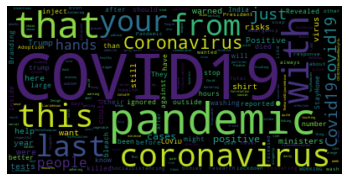

In [128]:
draw_word_cloud(df)

In [0]:
# api=authenticate()
# data = []
# count=4
# search_term='bread' 
# counter = 0 
# for tweet in tweepy.Cursor(api.search, q='\"{}\" -filter:retweets'.format(search_term), count=100, lang='en', tweet_mode='extended').items():
#         tweet_details = {}
#         tweet_details['name'] = tweet.user.screen_name
#         tweet_details['tweet'] = tweet.full_text
#         tweet_details['retweets'] = tweet.retweet_count
#         tweet_details['followers'] = tweet.user.followers_count
#         tweet_details['is_user_verified'] = tweet.user.verified
#         data.append(tweet_details)
#         counter += 1
#         if counter == count:
#             break
#         else:
#             pass
# with open('data/{}.json'.format(search_term), 'a+') as f:
#         for i in data:
#           json.dump(i,f)
# with open('data/{}.json'.format(search_term), 'r') as file :
#   filedata = file.read()

# # Replace the target string
# filedata = filedata.replace('}{', '},{')

# # Write the file out again
# with open('data/{}.json'.format(search_term), 'w') as file:
#   file.write(filedata)
        
# print(f'completed {search_term}')

In [0]:
# pd.read_json(f'data/bread.json',orient='records',lines=True)

In [0]:
# f=open('b.json','a')
# for i in data:
#   json.dump(i,f)


In [0]:
# with open('a.json', 'r') as file :
#   filedata = file.read()

# # Replace the target string
# filedata = filedata.replace('}{', '},{')

# # Write the file out again
# with open('a.json', 'w') as file:
#   file.write(filedata)